# Micro Credit Dataset Analysis and Prective Model Creation

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [2]:
df=pd.read_csv('Data file.csv',parse_dates=['pdate'])

# Cheaking the Correct Datset

In [3]:
df.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [4]:
#Cheaking the Shape
df.shape

(209593, 37)

In [5]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

These are the Columns present in Dataset

In [6]:
df.dtypes

Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30              

We can see that here are 2 object Column , 1 date column and rest are numerical column

In [7]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

# Exploratory Data Analysis

In [8]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


As we can see that the value of 75% and the value of max have huge differenec in many columns.So we can say that there are outliers avalable in this dataset.

In [9]:
#We can see that "Unnamed: 0" column is not relevant, so i am dropping it
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

# Importing Visualization Tools

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

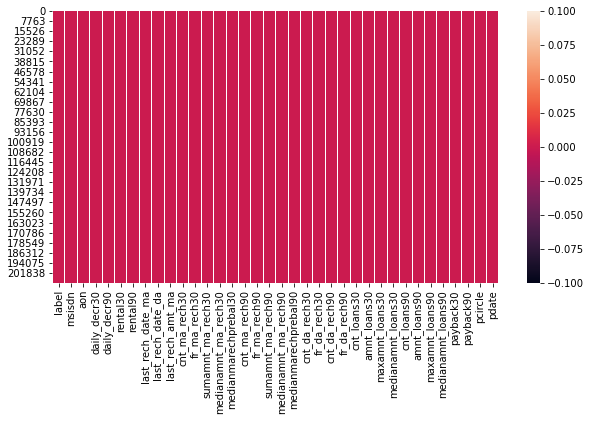

In [12]:
#Let's check null value using heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

Data analysis of "pdate" column

In [13]:
#From pdate we can get mothly ,daily,yearly average counts  which can help in data analysis
df_dates=pd.DataFrame()
df_dates['month']=df['pdate'].dt.month_name()
df_dates['year']=df['pdate'].dt.year
df_dates['day']=df['pdate'].dt.day_name()
df_dates['label']=df['label']
df_dates

,month,year,day,label
0,July,2016,Wednesday,0
1,August,2016,Wednesday,1
2,August,2016,Friday,1
3,June,2016,Monday,1
4,June,2016,Wednesday,1
...,...,...,...,...
209588,June,2016,Friday,1
209589,June,2016,Sunday,1
209590,July,2016,Friday,1
209591,July,2016,Monday,1


In [14]:
df_dates['year'].value_counts()

2016    209593
Name: year, dtype: int64

In [15]:
df_dates['month'].value_counts()

July      85765
June      83154
August    40674
Name: month, dtype: int64

So We can see that Datset contain these 3 months data

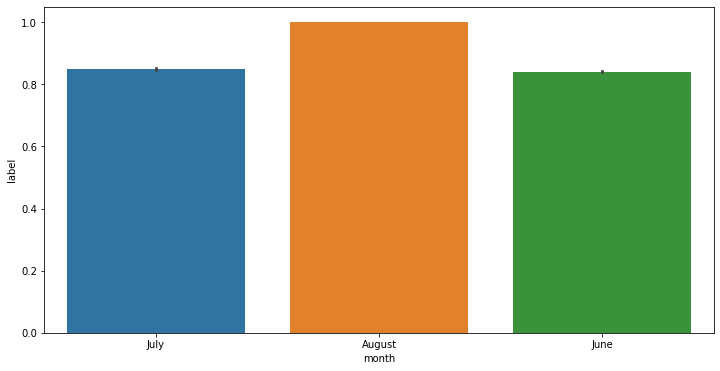

In [16]:
# average label during month of an year 
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='label',data=df_dates)
plt.show()
# it shows average label is increaseing from jun to august


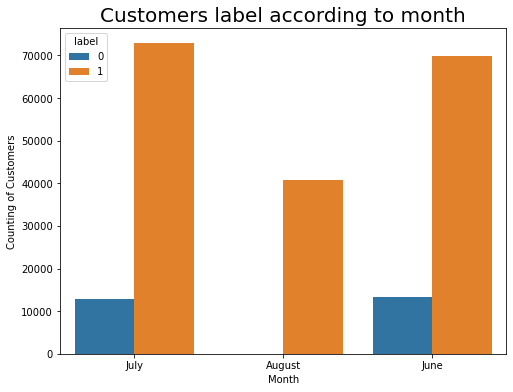

In [17]:
#Customer label according to Month
plt.figure(figsize=(8,6))
sns.countplot(x="month", hue='label', data=df_dates)
plt.title("Customers label according to month", fontsize=20)
plt.xlabel('Month')
plt.ylabel('Counting of Customers')
plt.show()

Observation:

Only Jun,July,August of 2016  data available.

Number of Non-Defaulter are greater than number of Defaulter.

In Month August there are no defaulters.

In [18]:
#Dropping the pdate columns because pdate not affect the outcome leabel.
df.drop(columns=['pdate'],axis=1, inplace = True)

In [19]:
#As we can see that 'msisdn' mobile number of customers.So if we drop the column it doesn't effect the output

df.drop(columns=['msisdn'],axis=1,inplace=True)

In [20]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

As we can see that 'pcircle' contains only one value 'UPW' and its about the network circle.So dropping the column doesn't effect the output value

In [21]:
#Droping 'pcircle column'
df.drop(columns=['pcircle'],axis=1,inplace=True)

In [22]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

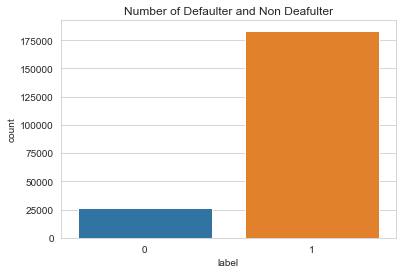

1    183431
0     26162
Name: label, dtype: int64


In [23]:
sns.set_style('whitegrid')
sns.countplot(x='label',data=df)
plt.title('Number of Defaulter and Non Deafulter')
plt.show()

print(df['label'].value_counts())

As we already know that data is imbalanced.Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='count'>

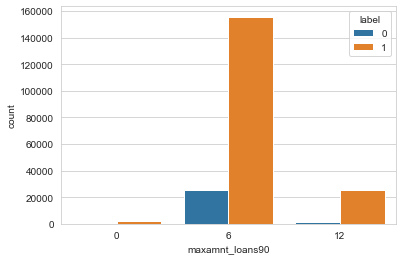

In [24]:
# Lets check the count of the maximum loan amount in 90 days taking by users along with label
sns.set_style('whitegrid')
sns.countplot(x='maxamnt_loans90',hue='label',data=df)

We can observe that Maximun users take 6 rupiah and few take 12 rupiah loan in last 90 days.And there are 12.5% defaulters.

<AxesSubplot:xlabel='amnt_loans90', ylabel='count'>

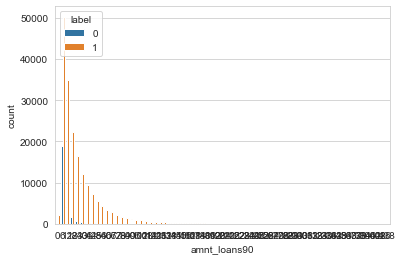

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='amnt_loans90',hue='label',data=df)

Here also we can see that Maximun users take 6 rupiah loan and most os the defaulters are 6 rupiah loan takers.

In [26]:
#Separating Numerical value and Categorical value columns
df_num=df.select_dtypes(include=[np.number])
df_obj=df.select_dtypes(include=[np.object])

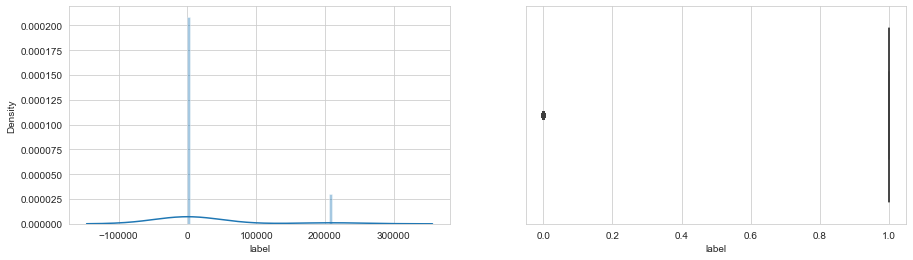

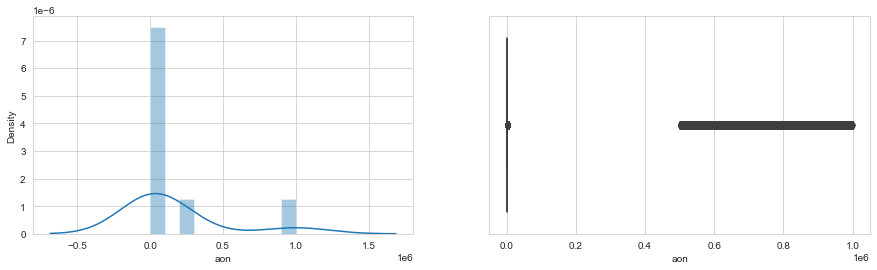

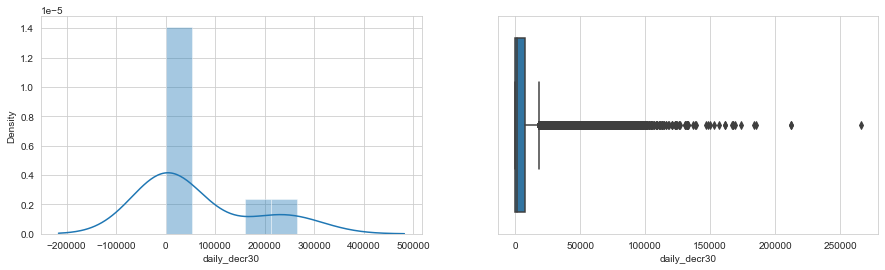

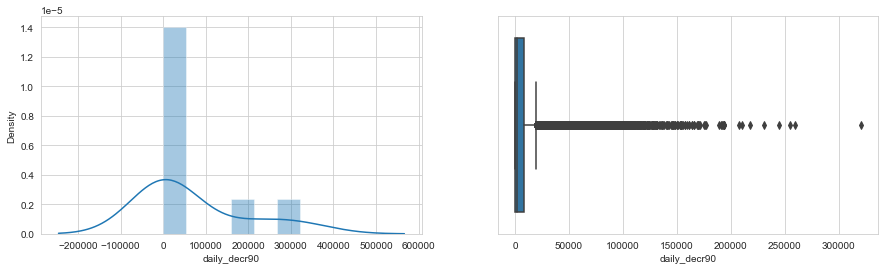

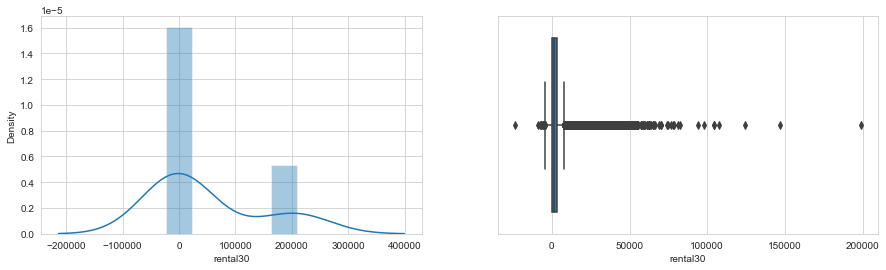

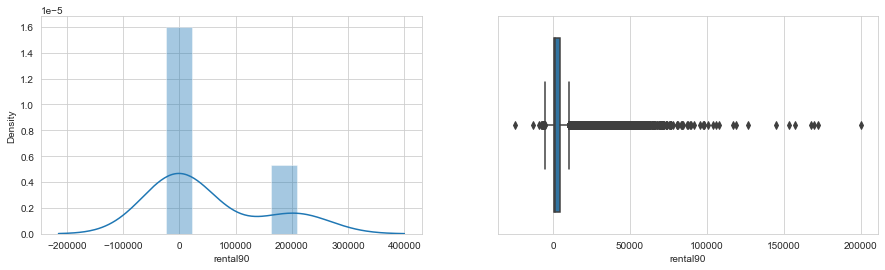

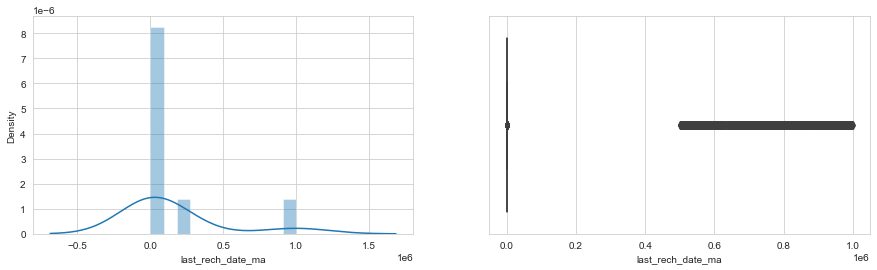

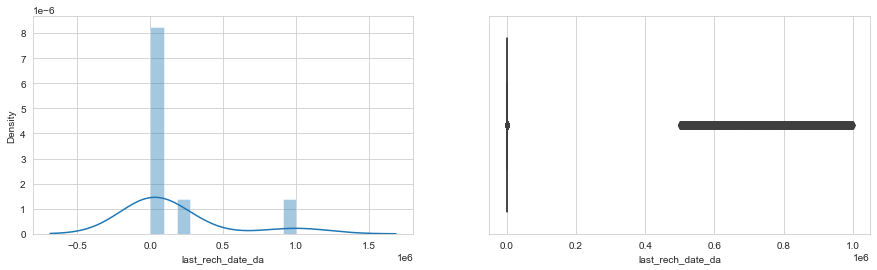

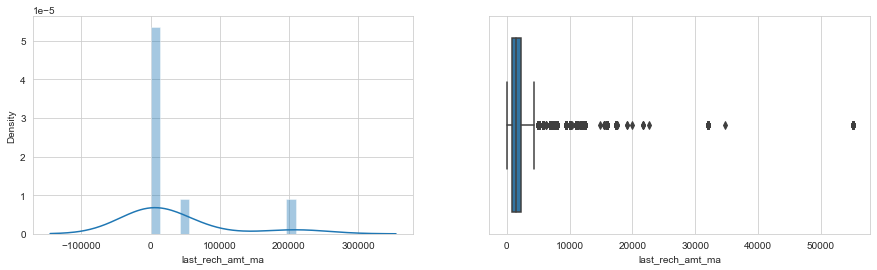

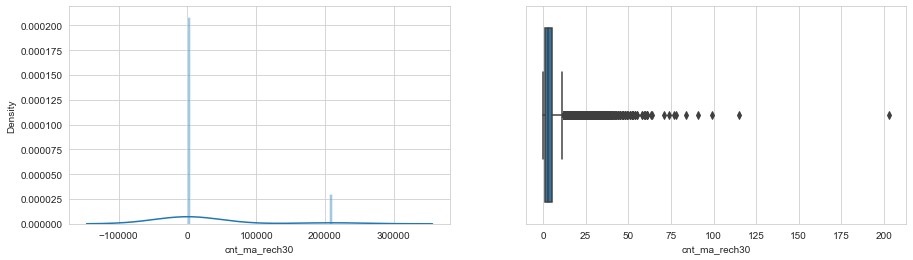

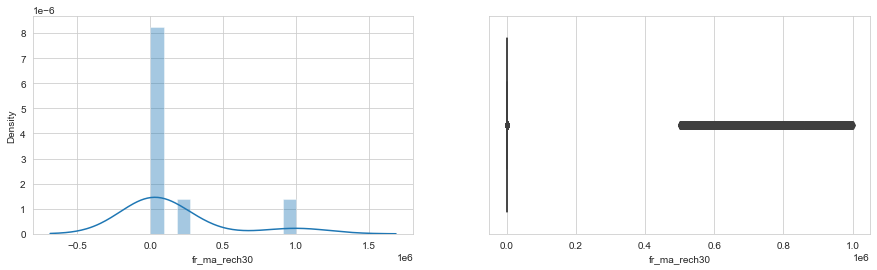

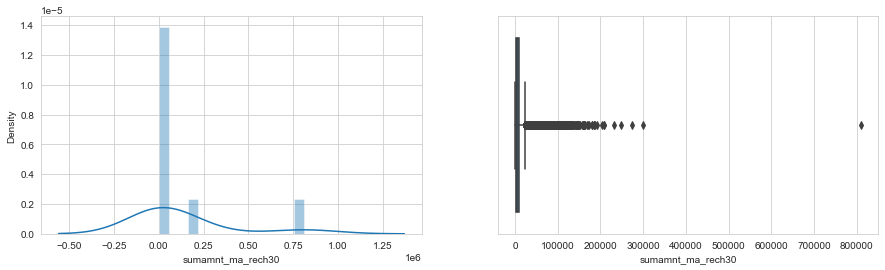

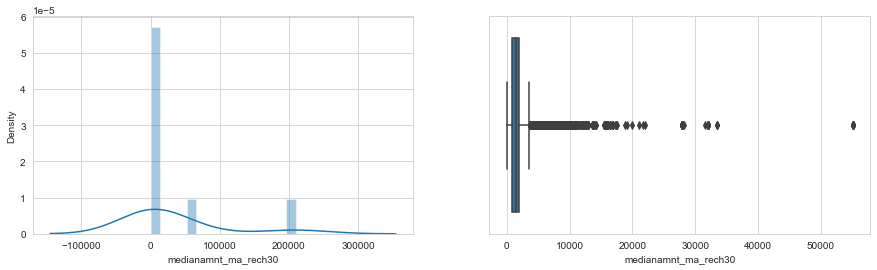

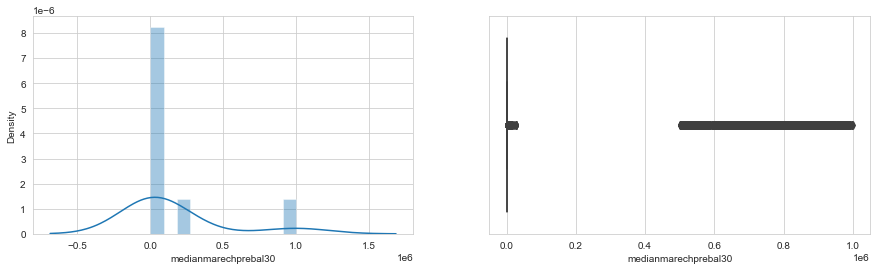

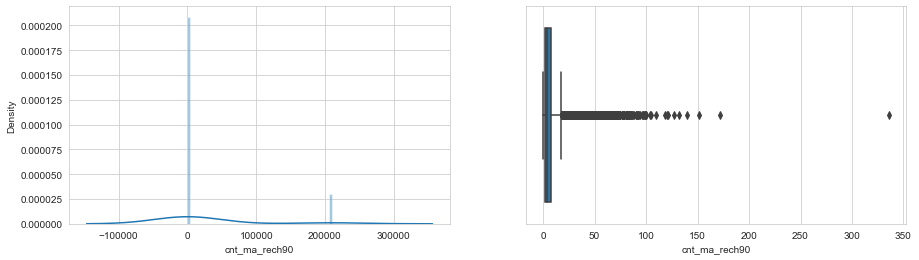

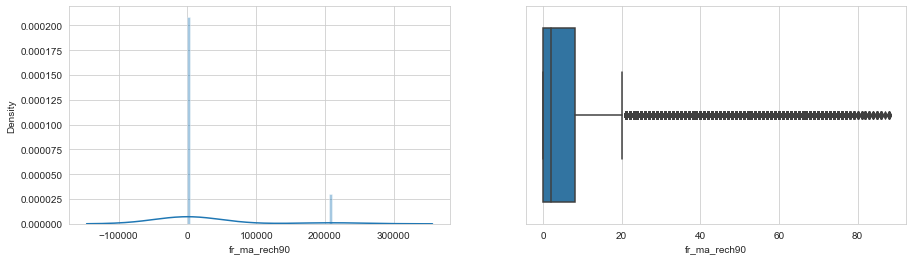

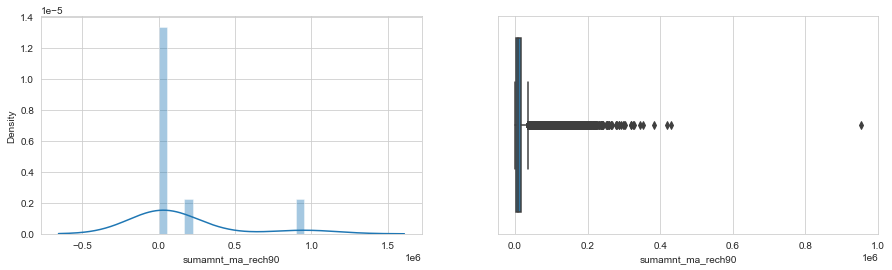

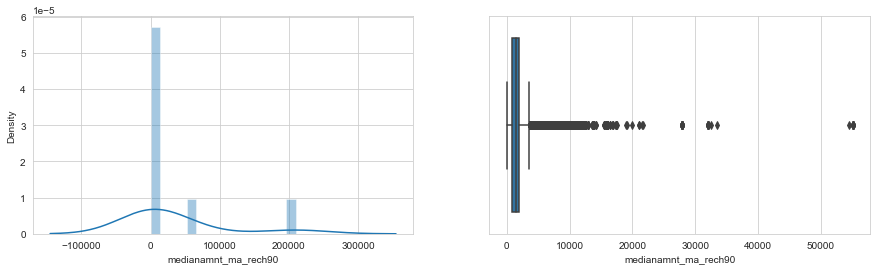

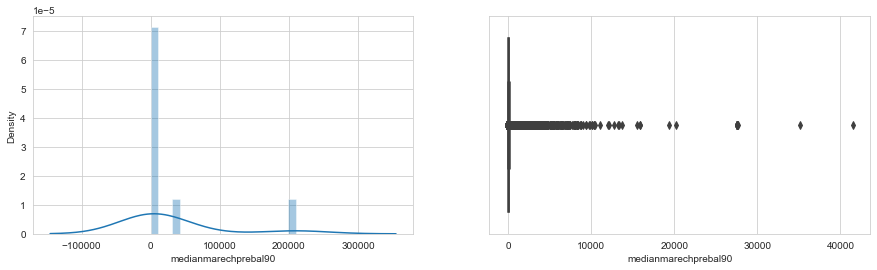

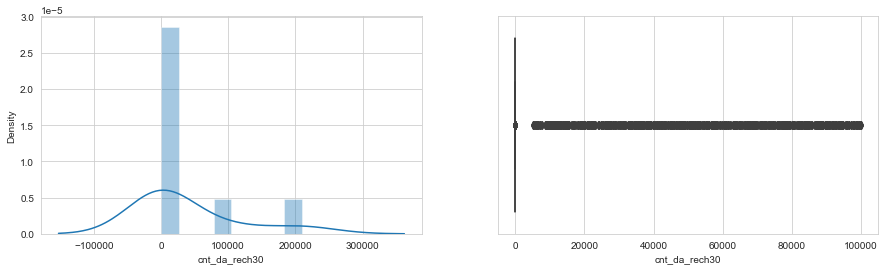

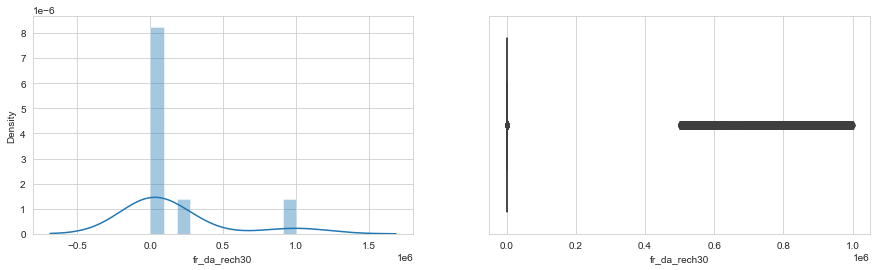

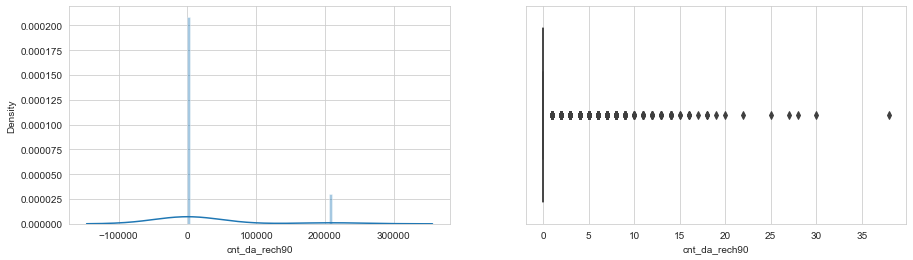

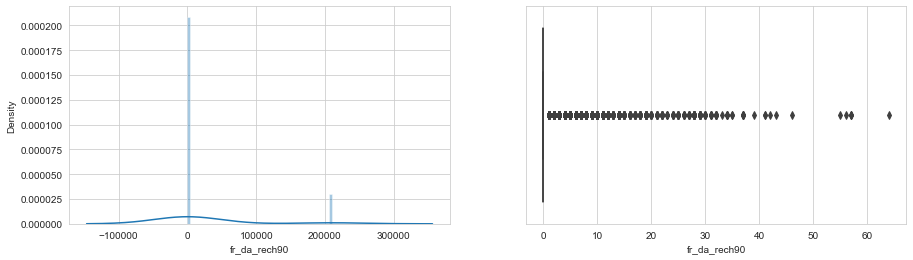

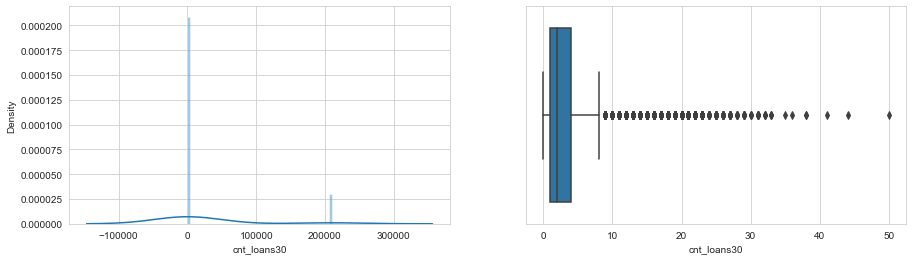

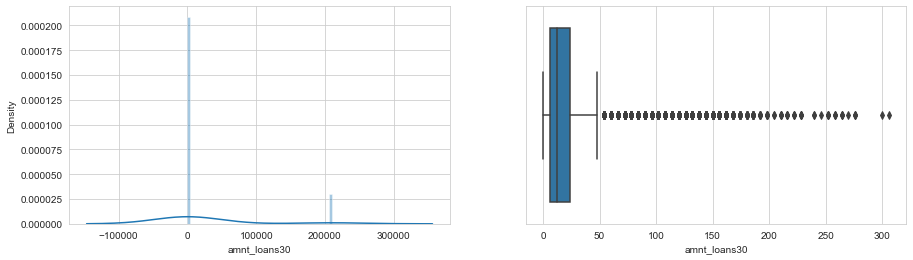

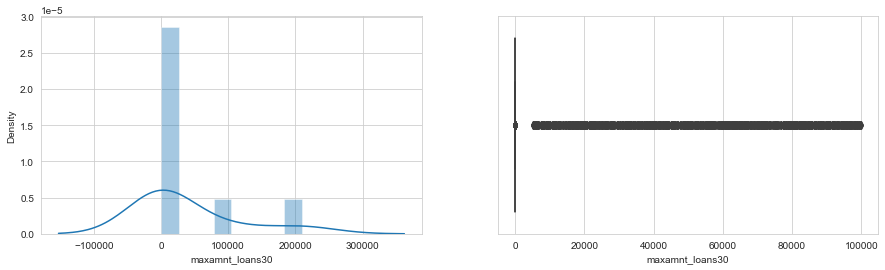

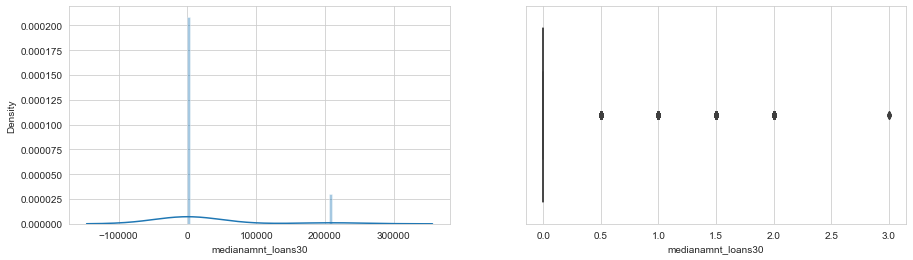

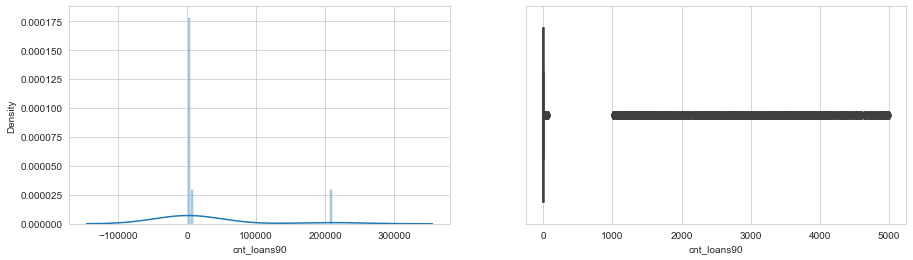

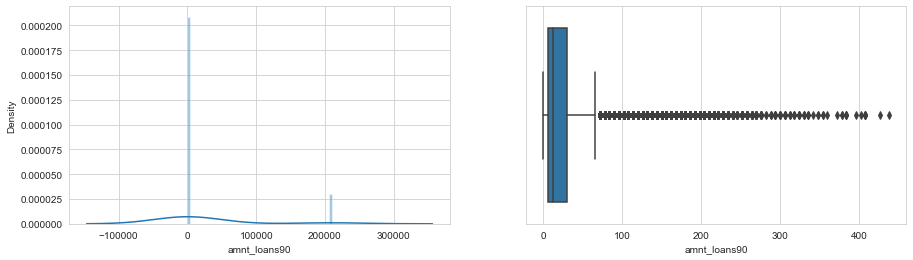

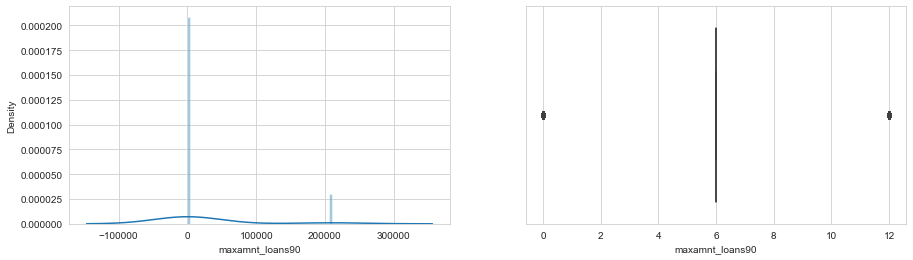

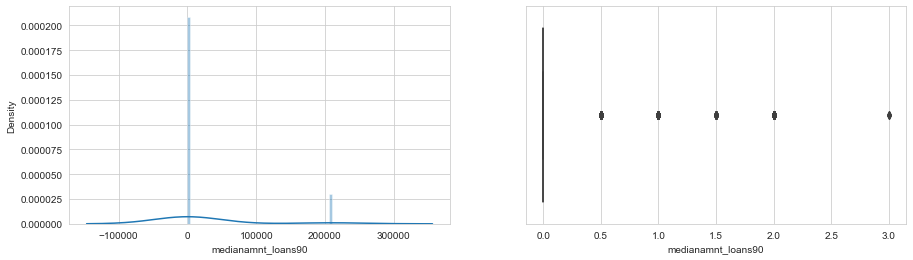

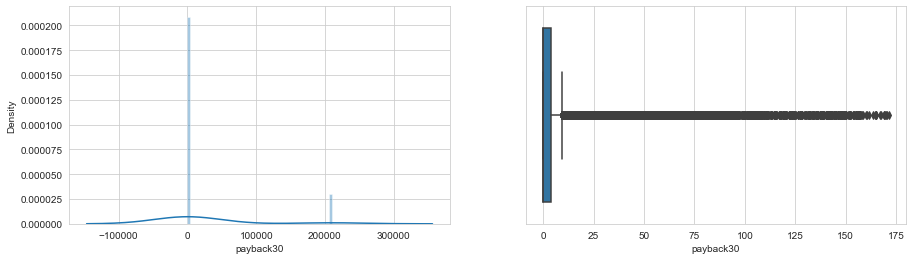

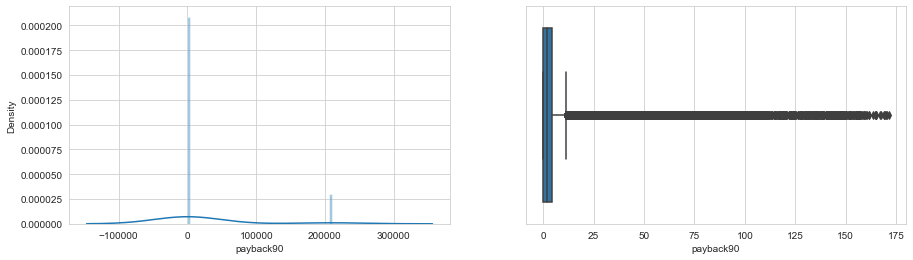

In [27]:
for i in df_num:
    f=plt.figure(figsize=(15,4))
    f.add_subplot(1,2,1)
    sns.distplot(df[i].describe())
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])

By Observing the Displot we can see the distribution of data and Skewness of the data

By Observing the Boxplot we can see that there are outliers available in every column.

# Data Cleaning

## Cheaking Correlation

In [28]:
corr=df.corr()

<AxesSubplot:>

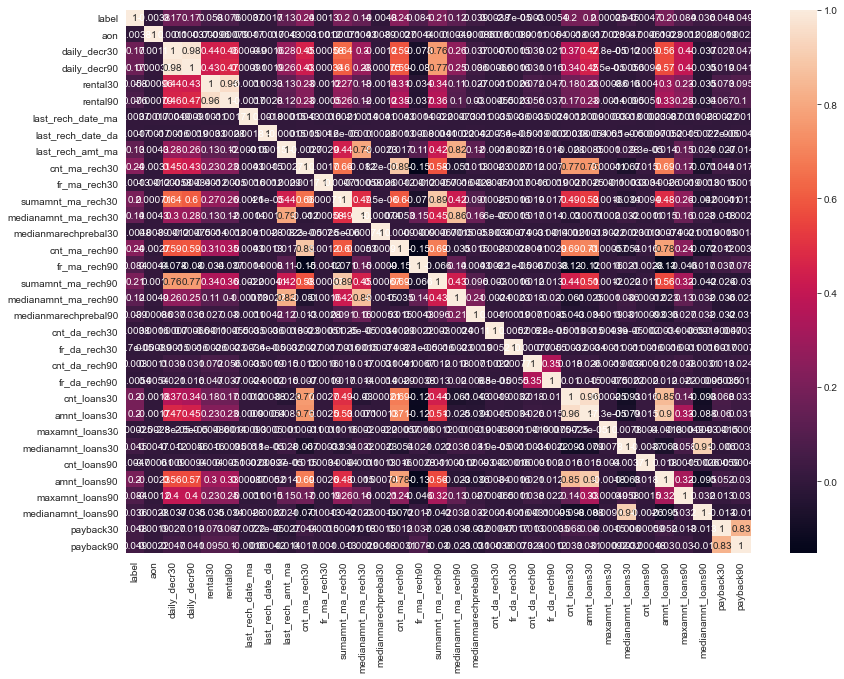

In [29]:
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True)

In [30]:
corr['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

By Oberving the Meatmap we can not understand the correlation between columns.
But seeing the values we can understand that most of the columns have no or little correlation.

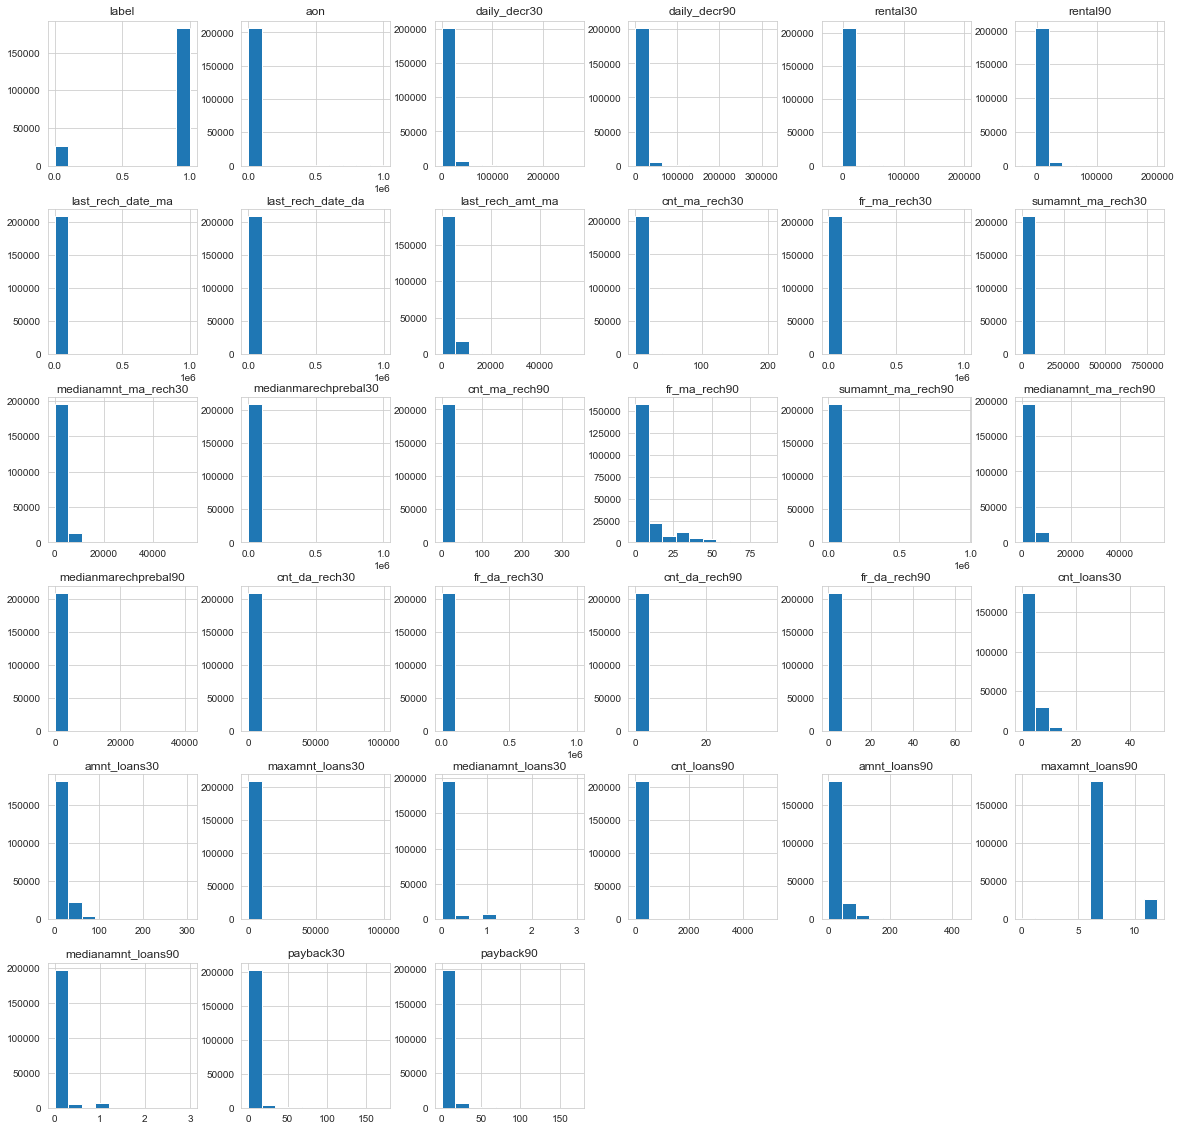

In [31]:
df.hist(figsize=(20,20))
plt.show()

# Cheak Outliers with Zscore

In [32]:
#Outliers Cheak
from scipy.stats import zscore

In [33]:
z=np.abs(zscore(df.select_dtypes(include=[np.number])))
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.09776412, 0.73103667, ..., 0.22959366, 0.38562959,
        0.41923266],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 0.22959366, 0.06820893,
        0.04735622],
       [0.37765836, 0.08428915, 0.77075515, ..., 0.22959366, 0.38562959,
        0.59938541],
       [0.37765836, 0.08628398, 0.09674426, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [34]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [35]:
#Revoming Outliers
df1=df[(z<3).all(axis=1)]

In [36]:
df1.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


Outliers Removed

In [37]:
df1.shape

(161465, 33)

<AxesSubplot:xlabel='label', ylabel='count'>

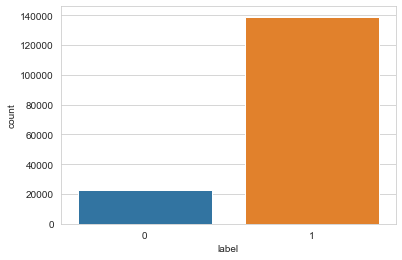

In [38]:
# After removing outliers again we check, what is the ratio of defaulters and non-defaulters users
sns.set_style('whitegrid')
sns.countplot(x='label', data=df1)

Shape of Only Numerical Column After Outliers Removed

In [39]:
df.shape

(209593, 33)

Shape of Only Numerical Column before Removal of Outliers

<AxesSubplot:xlabel='label', ylabel='count'>

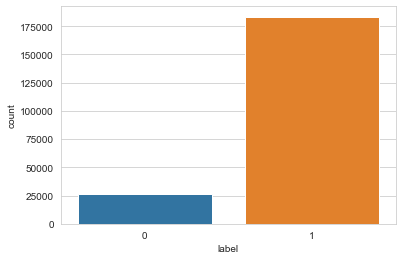

In [40]:
# Checking the average count of label
sns.set_style('whitegrid')
sns.countplot(x='label', data=df)

So as we can see that if we remove outliers we lose so much data.
Maximum row detect as outliers but not remove the outliers beacuse dataset is inbalance and if we remove the outliers than some row detect which contain information about defaulter.

# Check skewness

In [41]:
print(df.skew())
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

We can see that there is skew present in every column.Removing the skewd data cause data loss of defaulters.

In [42]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

As we can see that all the object columns are treated or transforms into numerical column

# Machine Learning

In [43]:
#splitting the data into X an Y
df_x=df.drop(['label'],axis=1)
y=df['label']

In [44]:
print(df_x.shape ,   y.shape)

(209593, 32) (209593,)


In [45]:
#Scaling the Input Variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)

In [46]:
print(x.shape ,   y.shape)

(209593, 32) (209593,)


# Importing necessary Machine Learning Algorythms and Matrixes



In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import train_test_split

### Lets Find the best Random state no for Maximum accuracy

In [48]:
maxAccu=0
maxRS=0


for i in range (1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LogisticRegression()
    
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print('Best accuracu is',maxAccu,'on Random State',maxRS)        

Best accuracu is 0.8794442642035153 on Random State 51


### Devide the data into Train and Test

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=51,stratify=y)

In [50]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(157194, 32) (52399, 32) (157194,) (52399,)


In [51]:
lr=LogisticRegression()
gnb=GaussianNB()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
adc=AdaBoostClassifier()

In [52]:
models=[]
models.append(('LogisticRegression',lr))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',adc))
models.append(('KNeighborsClassifier',knn))

### Train The Model for Best Accuracy

LogisticRegression


LogisticRegression()


Accuracy_score= 0.8767152044886353


Cross_Val_Score= 0.8763699183320106


roc_auc_score= 0.5125488695589742


classification_report
               precision    recall  f1-score   support

           0       0.65      0.03      0.05      6541
           1       0.88      1.00      0.93     45858

    accuracy                           0.88     52399
   macro avg       0.76      0.51      0.49     52399
weighted avg       0.85      0.88      0.82     52399



[[  178  6363]
 [   97 45761]]





GaussianNB


GaussianNB()


Accuracy_score= 0.5811561289337582


Cross_Val_Score= 0.5802197975400173


roc_auc_score= 0.7008710556678193


classification_report
               precision    recall  f1-score   support

           0       0.21      0.86      0.34      6541
           1       0.96      0.54      0.69     45858

    accuracy                           0.58     52399
   macro avg       0.59      0.70      0.52     52399
weighted avg       0.87

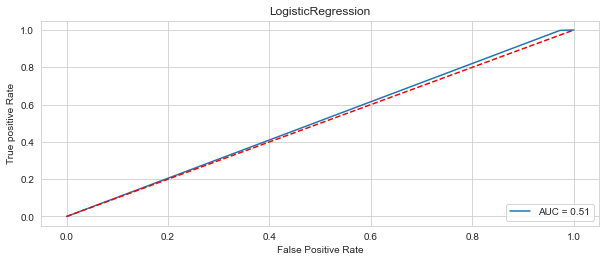

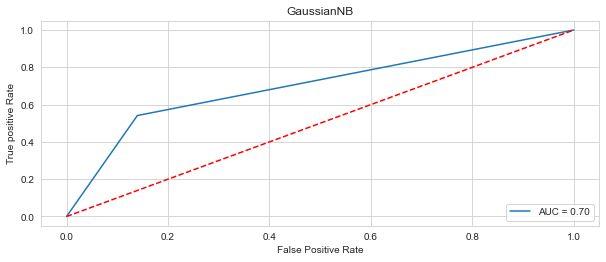

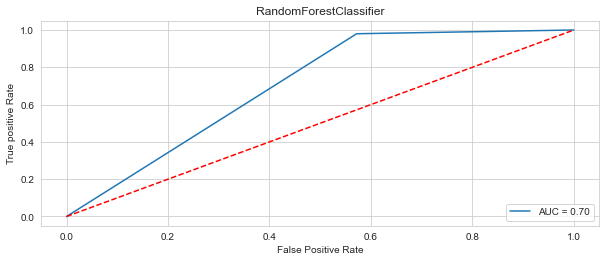

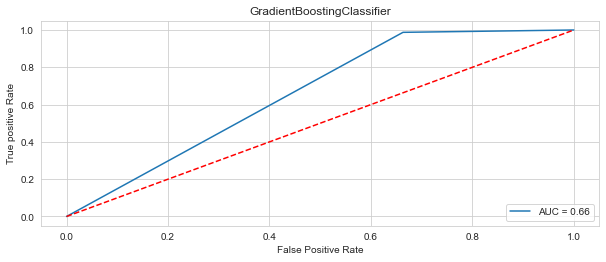

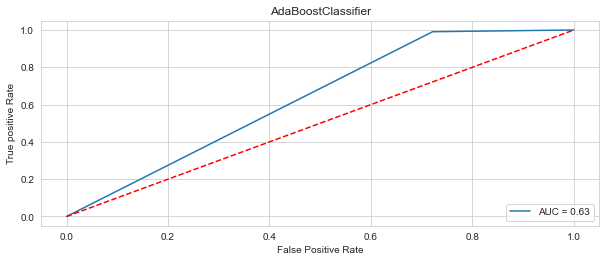

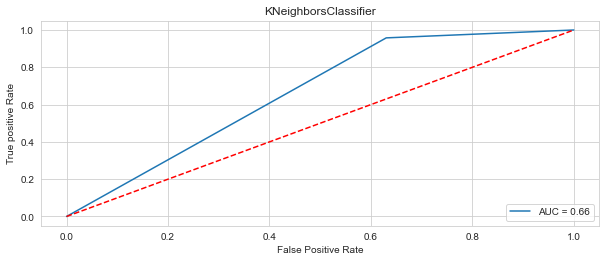

In [53]:
Model=[]
score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print(name)
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [54]:
result = pd.DataFrame({'Model':Model,'Accuracy_score': score,'cross_val_score':CVS,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,cross_val_score,Roc_auc_curve
0,LogisticRegression,87.671520,87.636992,51.254887
1,GaussianNB,58.115613,58.021980,70.087106
2,RandomForestClassifier,91.102884,91.315074,70.399268
3,GradientBoostingClassifier,90.621958,90.889487,66.211907
4,AdaBoostClassifier,90.190652,90.388993,63.455401
5,KNeighborsClassifier,88.434894,88.751056,66.378012


After applying Logistic Regression,GaussianNB,RandomForestClassifier,GradientBoosting,AdaBoost,KNeighbors
Random Forest Classifier Performs best with 91.08% accuracy and Auc score 70%

### Acoording to cross value score and Roc Score save our best model not use GridSearchCV for best paramets because dataset is vey large and take much time

## Now we can save the Model

In [55]:
#Import Data Serialization Technique
import joblib

In [56]:
joblib.dump(rfc,'Micro_Credit_Model.pkl')

['Micro_Credit_Model.pkl']